Download Data

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
import cv2

In [0]:
URL='https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip'
import requests, zipfile, io
r = requests.get(URL)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [0]:
ls MURA-v1.1/

train/                 train_labeled_studies.csv  valid_image_paths.csv
train_image_paths.csv  valid/                     valid_labeled_studies.csv


In [0]:
from pathlib import Path
PATH = Path('MURA-v1.1/')

## Training set

We have given bone x-ray images of following body parts

*   WRIST
*   SHOULDER    
*  HAND        
*  FINGER      
*  ELBOW       
*  FOREARM      
*  HUMERUS

and 4 different study types.



In [0]:
import pandas as pd
pd.set_option('display.max_colwidth',-1)
columns=['img_path','label']
trn_labels=pd.read_csv(PATH/'train_labeled_studies.csv',names=columns)
trn_labels.head()

,img_path,label
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/,1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/,1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/,1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/,1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/,1


In [0]:
trn_labels.shape

(13457, 2)

In [0]:
trn_labels.label.value_counts()

0    8280
1    5177
Name: label, dtype: int64

In [0]:
trn_labels.label.value_counts(normalize=True) #in percentage

0    0.615293
1    0.384707
Name: label, dtype: float64

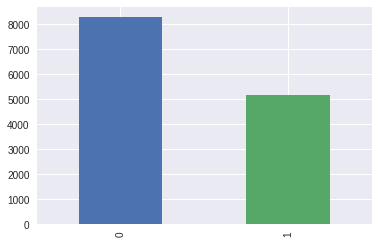

In [0]:
trn_labels.label.value_counts().plot(kind='bar');

In [0]:
trn_labels['body_part']=trn_labels['img_path'].apply(lambda x: str(x.split('/')[2])[3:])
trn_labels['study_type']=trn_labels['img_path'].apply(lambda x: str(x.split('/')[4])[:6])

In [0]:
trn_labels.head()

,img_path,label,body_part,study_type
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/,1,SHOULDER,study1
1,MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/,1,SHOULDER,study1
2,MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/,1,SHOULDER,study1
3,MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/,1,SHOULDER,study1
4,MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/,1,SHOULDER,study1


In [0]:
trn_labels.body_part.value_counts()

WRIST       3460
SHOULDER    2821
HAND        2018
FINGER      1935
ELBOW       1754
FOREARM     877 
HUMERUS     592 
Name: body_part, dtype: int64

''

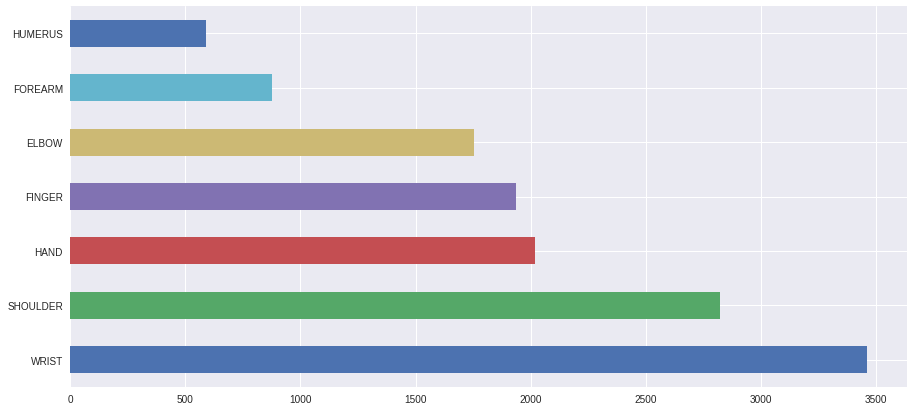

In [0]:
plt.figure(figsize=(15,7))
trn_labels.body_part.value_counts().plot(kind='barh')
;

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


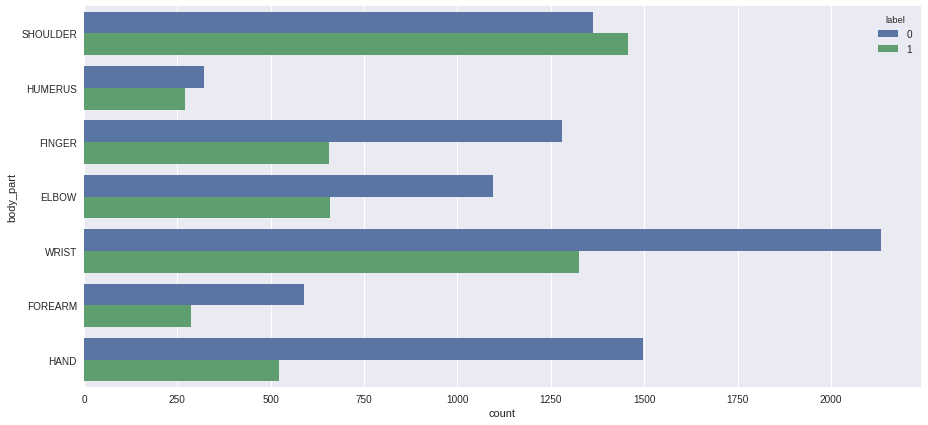

In [0]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.countplot(data=trn_labels,y='body_part',hue='label');

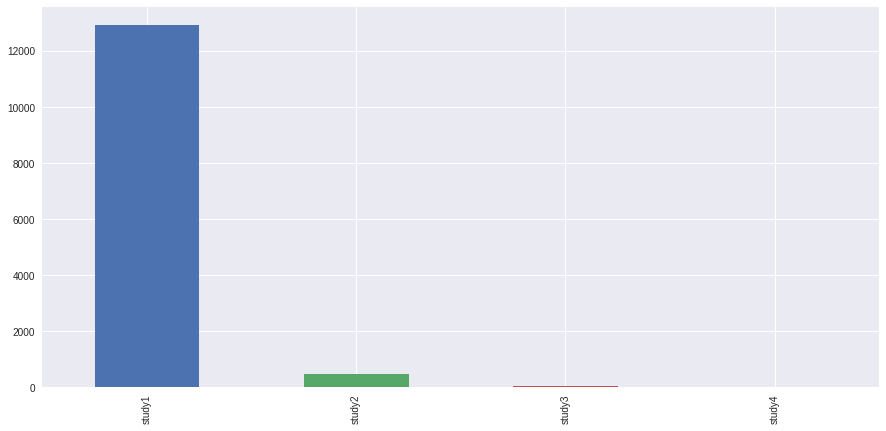

In [0]:
plt.figure(figsize=(15,7))

trn_labels.study_type.value_counts().plot(kind='bar');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


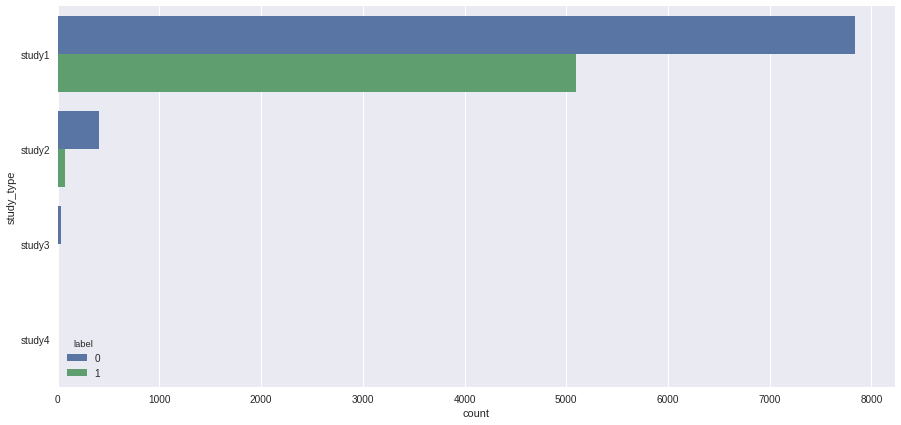

In [0]:
plt.figure(figsize=(15,7))
sns.countplot(data=trn_labels,y='study_type',hue='label');

## training images

These are 3 colour channel mostly grey looking images.
with different image sizes

In [0]:
column=['img_path']
trn_img_path=pd.read_csv(PATH/'train_image_paths.csv',names=column)
trn_img_path.head()

,img_path
0,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
1,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png
2,MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png
3,MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png
4,MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png


In [0]:
trn_img_path.shape

(36808, 1)

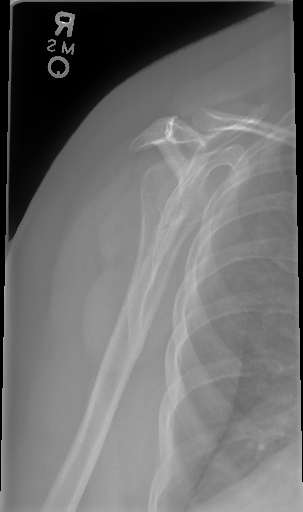

In [0]:
from PIL import Image
im=Image.open(trn_img_path.img_path[1])
im

In [0]:
im.size

(303, 512)

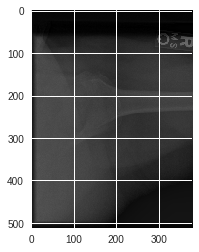

(512, 380, 3)


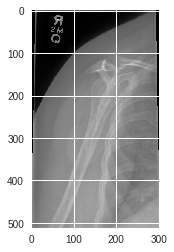

(512, 303, 3)


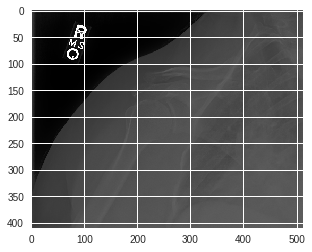

(410, 512, 3)


In [0]:
for path in trn_img_path.values[:3]:
    img=cv2.imread(path[0])
    #plt.imshow(plt.imread(path[0]))
    plt.imshow(img)
    plt.show()
    print (img.shape)

## validation set

In [0]:
val_labels=pd.read_csv(PATH/'valid_labeled_studies.csv',names=columns)
val_labels.head()

,img_path,label
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/,1
1,MURA-v1.1/valid/XR_WRIST/patient11186/study1_positive/,1
2,MURA-v1.1/valid/XR_WRIST/patient11186/study2_positive/,1
3,MURA-v1.1/valid/XR_WRIST/patient11186/study3_positive/,1
4,MURA-v1.1/valid/XR_WRIST/patient11187/study1_positive/,1


In [0]:
val_labels.label.value_counts()

0    661
1    538
Name: label, dtype: int64

In [0]:
val_labels.label.value_counts(normalize=True)

0    0.551293
1    0.448707
Name: label, dtype: float64

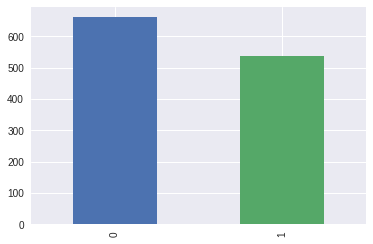

In [0]:
val_labels.label.value_counts().plot(kind='bar');

## Validation images

In [0]:
val_img_path=pd.read_csv(PATH/'valid_image_paths.csv',names=column)
val_img_path.head()

,img_path
0,MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png
1,MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image2.png
2,MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image3.png
3,MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image4.png
4,MURA-v1.1/valid/XR_WRIST/patient11186/study1_positive/image1.png


In [0]:
trn_img_path.shape,val_img_path.shape


((36808, 1), (3197, 1))